# Takes final csv catalogue and fixes columns, adds in var. etc.

In [1]:
# Call the relevant python packages
%matplotlib inline
import math
import random
import numpy as np
import pandas as pd
import glob, os
import nway
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from astropy import units as u
from astropy.io import ascii, fits
from astropy.table import join, hstack, Table, Column, vstack
from astropy.coordinates import Angle, Latitude, Longitude, SkyCoord

# Set colour palette & plot layouts
import seaborn as sns     #; sns.set()
sns.set_context("paper")   # "paper", "notebook", "talk", "poster"

In [15]:
# Make sure the N/A flag is 9999 in the below file
file = 'final_cats/1_rmax_&_point2_pos.csv'
data = ascii.read(file, data_start=1)
#print(data.colnames)

# Label sources with ID number
data['ID']=0
for i in range(len(data)):
    data['ID'][i]=i+1

# A list of all the current column names we want to change and include in the final table
old_cols=['S1_1_3_4_ID', 'S1_1_3_4_S1_1_3_S1_F1_RA', 'S1_1_3_4_S1_1_3_S1_F1_DEC', 'S1_1_3_4_S1_1_3_S1_F1_MAG1_1',
          'S1_1_3_4_S1_1_3_S1_F1_ERR1_1', 'S1_1_3_4_S1_1_3_S1_F3_ID', 'S1_1_3_4_S1_1_3_S1_F3_RA',
          'S1_1_3_4_S1_1_3_S1_F3_DEC', 'S1_1_3_4_S1_1_3_S1_F3_MAG1_3', 'S1_1_3_4_S1_1_3_S1_F3_ERR1_3',
          'S1_1_3_4_S1_1_3_Separation_S1_F3_S1_F1', 'S1_1_3_4_S1_1_3_p_any', 'S1_1_3_4_S1_1_3_p_i',
          'S1_1_3_4_S1_F4_ID', 'S1_1_3_4_S1_F4_RA', 'S1_1_3_4_S1_F4_DEC', 'S1_1_3_4_S1_F4_MAG1_4',
          'S1_1_3_4_S1_F4_ERR1_4', 'S1_1_3_4_Separation_S1_F4_S1_1_3', 'S1_1_3_4_p_any', 'S1_1_3_4_p_i',
          'S1_1_3_4_asn', 'S1_1_3_4_RA', 'S1_1_3_4_DEC',
          'S2_1_3_4_ID', 'S2_1_3_4_S2_1_3_S2_F1_RA', 'S2_1_3_4_S2_1_3_S2_F1_DEC', 'S2_1_3_4_S2_1_3_S2_F1_MAG2_1',
          'S2_1_3_4_S2_1_3_S2_F1_ERR2_1', 'S2_1_3_4_S2_1_3_S2_F3_ID', 'S2_1_3_4_S2_1_3_S2_F3_RA',
          'S2_1_3_4_S2_1_3_S2_F3_DEC', 'S2_1_3_4_S2_1_3_S2_F3_MAG2_3', 'S2_1_3_4_S2_1_3_S2_F3_ERR2_3',
          'S2_1_3_4_S2_1_3_Separation_S2_F3_S2_F1', 'S2_1_3_4_S2_1_3_p_any', 'S2_1_3_4_S2_1_3_p_i',
          'S2_1_3_4_S2_F4_ID', 'S2_1_3_4_S2_F4_RA', 'S2_1_3_4_S2_F4_DEC', 'S2_1_3_4_S2_F4_MAG2_4',
          'S2_1_3_4_S2_F4_ERR2_4', 'S2_1_3_4_Separation_S2_F4_S2_1_3', 'S2_1_3_4_p_any', 'S2_1_3_4_p_i',
          'S2_1_3_4_asn', 'S2_1_3_4_RA', 'S2_1_3_4_DEC',
          'Separation_S2_1_3_4_S1_1_3_4', 'p_any', 'p_i', 'total_asn', 'mean_RA', 'mean_DEC']

# A list of all the new column names we want, corresponding to the list above
new_cols=['ID_36_1','RA_36_1','Dec_36_1','mag_36_1',
          'mag_err_36_1','ID_36_3','RA_36_3',
          'Dec_36_3','mag_36_3','mag_err_36_3',
          'sep_36_1_3','p_any_36_1_3','p_i_36_1_3',
          'ID_36_4','RA_36_4','Dec_36_4','mag_36_4',
          'mag_err_36_4','sep_36_1&3_4','p_any_36_1&3_4','p_i_36_1&3_4',
          '36_associations','mean_RA_36','mean_Dec_36',
          'ID_45_1','RA_45_1','Dec_45_1','mag_45_1',
          'mag_err_45_1','ID_45_3','RA_45_3',
          'Dec_45_3','mag_45_3','mag_err_45_3',
          'sep_45_1_3','p_any_45_1_3','p_i_45_1_3',
          'ID_45_4','RA_45_4','Dec_45_4','mag_45_4',
          'mag_err_45_4','sep_45_1&3_4','p_any_45_1&3_4','p_i_45_1&3_4',
          '45_associations','mean_RA_45','mean_Dec_45',
          'sep_mean_36_mean_45','p_any_36_45','p_i_36_45','total_associations','RA','Dec',
          'ID']

# Rename each column
for i in range(len(old_cols)):
    old_column = old_cols[i]
    new_column = new_cols[i]
    data.rename_column(old_column,new_column)

# Order columns in a sensible order
all_cols=['ID','RA','Dec','total_associations',
          'ID_36_1','RA_36_1','Dec_36_1','mag_36_1','mag_err_36_1',
          'ID_36_3','RA_36_3','Dec_36_3','mag_36_3','mag_err_36_3',
          'sep_36_1_3','p_any_36_1_3','p_i_36_1_3',
          'ID_36_4','RA_36_4','Dec_36_4','mag_36_4','mag_err_36_4',
          'sep_36_1&3_4','p_any_36_1&3_4','p_i_36_1&3_4',
          '36_associations',
          'ID_45_1','RA_45_1','Dec_45_1','mag_45_1','mag_err_45_1',
          'ID_45_3','RA_45_3','Dec_45_3','mag_45_3','mag_err_45_3',
          'sep_45_1_3','p_any_45_1_3','p_i_45_1_3',
          'ID_45_4','RA_45_4','Dec_45_4','mag_45_4','mag_err_45_4',
          'sep_45_1&3_4','p_any_45_1&3_4','p_i_45_1&3_4',
          '45_associations',
          'sep_mean_36_mean_45','p_any_36_45','p_i_36_45']

new_data = data[all_cols]

ascii.write(new_data, 'final_cats/secondary_cat_columns.csv',format='csv')

In [16]:
second_file = 'final_cats/secondary_cat_columns.csv'
second_data = ascii.read(second_file, data_start=1)


# Set up empty columns which will be filled with calculated results below
second_data['flux_36_1']=float(9999)
second_data['flux_36_3']=float(9999)
second_data['flux_36_4']=float(9999)
second_data['flux_45_1']=float(9999)
second_data['flux_45_3']=float(9999)
second_data['flux_45_4']=float(9999)
second_data['flux_err_36_1']=float(9999)
second_data['flux_err_36_3']=float(9999)
second_data['flux_err_36_4']=float(9999)
second_data['flux_err_45_1']=float(9999)
second_data['flux_err_45_3']=float(9999)
second_data['flux_err_45_4']=float(9999)
second_data['var_36_1_3']=float(9999)
second_data['var_36_1_4']=float(9999)
second_data['var_36_3_4']=float(9999)
second_data['var_45_1_3']=float(9999)
second_data['var_45_1_4']=float(9999)
second_data['var_45_3_4']=float(9999)
second_data['mean_mag_36']=0.0
second_data['mean_mag_45']=0.0
second_data['amp_36']=0.0
second_data['amp_45']=0.0

#########################################################################################################################
################################################# F L U X ###############################################################
#########################################################################################################################

# Hardcode zero points of filters for Vega system.
# Fluxes and their errors are given in mJy
F_0_36, F_0_err_36, m_0_36 = 280900, 4100, 0.0
F_0_45, F_0_err_45, m_0_45 = 179700, 2600, 0.0

# Define lists for fluxes, magnitudes and their errors for each filter
flux_list_36 = ['flux_36_1','flux_36_3','flux_36_4']
flux_err_list_36 = ['flux_err_36_1','flux_err_36_3','flux_err_36_4']
flux_list_45 = ['flux_45_1','flux_45_3','flux_45_4']
flux_err_list_45 = ['flux_err_45_1','flux_err_45_3','flux_err_45_4']
mag_list_36 = ['mag_36_1','mag_36_3','mag_36_4']
mag_err_list_36 = ['mag_err_36_1','mag_err_36_3','mag_err_36_4']
mag_list_45 = ['mag_45_1','mag_45_3','mag_45_4']
mag_err_list_45 = ['mag_err_45_1','mag_err_45_3','mag_err_45_4']

# Find where sensible magnitude data is and make lists of the indices for each filter
good_mag_36_1_idx = np.where(second_data['mag_36_1']!=9999)
good_mag_36_3_idx = np.where(second_data['mag_36_3']!=9999)
good_mag_36_4_idx = np.where(second_data['mag_36_4']!=9999)
good_mag_45_1_idx = np.where(second_data['mag_45_1']!=9999)
good_mag_45_3_idx = np.where(second_data['mag_45_3']!=9999)
good_mag_45_4_idx = np.where(second_data['mag_45_4']!=9999)
good_idx_list_36 = [good_mag_36_1_idx,good_mag_36_3_idx,good_mag_36_4_idx]
good_idx_list_45 = [good_mag_45_1_idx,good_mag_45_3_idx,good_mag_45_4_idx]

# Write fluxes and flux errors for each epoch and each filter
# NB: flux is in mJy
for i in range(len(flux_list_36)):
    flux_name = flux_list_36[i]
    flux_err_name = flux_err_list_36[i]
    mag_name = mag_list_36[i]
    mag_err_name = mag_err_list_36[i]
    idx = good_idx_list_36[i]
    second_data[flux_name][idx]=F_0_36*np.power(10,0.4*(m_0_36-second_data[mag_name][idx]))
    second_data[flux_err_name][idx]=(np.log(10)/2.5)*second_data[mag_err_name][idx]*second_data[flux_name][idx]
for i in range(len(flux_list_45)):
    flux_name = flux_list_45[i]
    flux_err_name = flux_err_list_45[i]
    mag_name = mag_list_45[i]
    mag_err_name = mag_err_list_45[i]
    idx = good_idx_list_45[i]
    second_data[flux_name][idx]=F_0_45*np.power(10,0.4*(m_0_45-second_data[mag_name][idx]))
    second_data[flux_err_name][idx]=(np.log(10)/2.5)*second_data[mag_err_name][idx]*second_data[flux_name][idx]
    
#########################################################################################################################
################################################# VARIABILITY ###########################################################
#########################################################################################################################

# For variability, find where both epochs in question have sensible magnitude data and calculate var. indices (V)
good_36_1_3_idx = np.where((second_data['mag_36_1']!=9999) & (second_data['mag_36_3']!=9999))
error_36_1_3 = np.power((np.power(second_data['flux_err_36_1'][good_36_1_3_idx],2)+np.power(second_data['flux_err_36_3'][good_36_1_3_idx],2)),0.5)
second_data['var_36_1_3'][good_36_1_3_idx] = abs((second_data['flux_36_1'][good_36_1_3_idx]-second_data['flux_36_3'][good_36_1_3_idx])/error_36_1_3)

good_36_1_4_idx = np.where((second_data['mag_36_1']!=9999) & (second_data['mag_36_4']!=9999))
error_36_1_4 = np.power((np.power(second_data['flux_err_36_1'][good_36_1_4_idx],2)+np.power(second_data['flux_err_36_4'][good_36_1_4_idx],2)),0.5)
second_data['var_36_1_4'][good_36_1_4_idx] = abs((second_data['flux_36_1'][good_36_1_4_idx]-second_data['flux_36_4'][good_36_1_4_idx])/error_36_1_4)

good_36_3_4_idx = np.where((second_data['mag_36_3']!=9999) & (second_data['mag_36_4']!=9999))
error_36_3_4 = np.power((np.power(second_data['flux_err_36_3'][good_36_3_4_idx],2)+np.power(second_data['flux_err_36_4'][good_36_3_4_idx],2)),0.5)
second_data['var_36_3_4'][good_36_3_4_idx] = abs((second_data['flux_36_3'][good_36_3_4_idx]-second_data['flux_36_4'][good_36_3_4_idx])/error_36_3_4)

good_45_1_3_idx = np.where((second_data['mag_45_1']!=9999) & (second_data['mag_45_3']!=9999))
error_45_1_3 = np.power((np.power(second_data['flux_err_45_1'][good_45_1_3_idx],2)+np.power(second_data['flux_err_45_3'][good_45_1_3_idx],2)),0.5)
second_data['var_45_1_3'][good_45_1_3_idx] = abs((second_data['flux_45_1'][good_45_1_3_idx]-second_data['flux_45_3'][good_45_1_3_idx])/error_45_1_3)

good_45_1_4_idx = np.where((second_data['mag_45_1']!=9999) & (second_data['mag_45_4']!=9999))
error_45_1_4 = np.power((np.power(second_data['flux_err_45_1'][good_45_1_4_idx],2)+np.power(second_data['flux_err_45_4'][good_45_1_4_idx],2)),0.5)
second_data['var_45_1_4'][good_45_1_4_idx] = abs((second_data['flux_45_1'][good_45_1_4_idx]-second_data['flux_45_4'][good_45_1_4_idx])/error_45_1_4)

good_45_3_4_idx = np.where((second_data['mag_45_3']!=9999) & (second_data['mag_45_4']!=9999))
error_45_3_4 = np.power((np.power(second_data['flux_err_45_3'][good_45_3_4_idx],2)+np.power(second_data['flux_err_45_4'][good_45_3_4_idx],2)),0.5)
second_data['var_45_3_4'][good_45_3_4_idx] = abs((second_data['flux_45_3'][good_45_3_4_idx]-second_data['flux_45_4'][good_45_3_4_idx])/error_45_3_4)

#########################################################################################################################
################################################# AMPLITUDES ############################################################
#########################################################################################################################

# Compare epoch 1 mag. to the other two (one or both of the latter will be sensible so find these)
for i in range(len(second_data)):
    max_mag_36 = second_data['mag_36_1'][i]
    min_mag_36 = second_data['mag_36_1'][i]
    if second_data['mag_36_3'][i]!=9999:
        if second_data['mag_36_3'][i]>max_mag_36:
            max_mag_36=second_data['mag_36_3'][i]
        elif second_data['mag_36_3'][i]<min_mag_36:
            min_mag_36=second_data['mag_36_3'][i]
    if second_data['mag_36_4'][i]!=9999:
        if second_data['mag_36_4'][i]>max_mag_36:
            max_mag_36=second_data['mag_36_4'][i]
        elif second_data['mag_36_4'][i]<min_mag_36:
            min_mag_36=second_data['mag_36_4'][i]
    second_data['amp_36'][i] = max_mag_36-min_mag_36
    
    max_mag_45 = second_data['mag_45_1'][i]
    min_mag_45 = second_data['mag_45_1'][i]
    if second_data['mag_45_3'][i]!=9999:
        if second_data['mag_45_3'][i]>max_mag_45:
            max_mag_45=second_data['mag_45_3'][i]
        elif second_data['mag_45_3'][i]<min_mag_45:
            min_mag_45=second_data['mag_45_3'][i]
    if second_data['mag_45_4'][i]!=9999:
        if second_data['mag_45_4'][i]>max_mag_45:
            max_mag_45=second_data['mag_45_4'][i]
        elif second_data['mag_45_4'][i]<min_mag_45:
            min_mag_45=second_data['mag_45_4'][i]
    second_data['amp_45'][i] = max_mag_45-min_mag_45
    

#########################################################################################################################
################################################# M E A N ###############################################################
#########################################################################################################################

for i in range(len(second_data)):
    mean_mag_36 = second_data['mag_36_1'][i]
    counter = 1
    if second_data['mag_36_3'][i]!=9999:
        mean_mag_36 += second_data['mag_36_3'][i]
        counter += 1
    if second_data['mag_36_4'][i]!=9999:
        mean_mag_36 += second_data['mag_36_4'][i]
        counter += 1
    mean_mag_36 = mean_mag_36/counter
    second_data['mean_mag_36'][i]=mean_mag_36
    
for i in range(len(second_data)):
    if second_data['mag_45_1'][i]!=9999:
        mean_mag_45 = second_data['mag_45_1'][i]
        counter = 1
    else:
        mean_mag_45 = 0
        counter = 0
    if second_data['mag_45_3'][i]!=9999:
        mean_mag_45 += second_data['mag_45_3'][i]
        counter += 1
    if second_data['mag_45_4'][i]!=9999:
        mean_mag_45 += second_data['mag_45_4'][i]
        counter += 1
    mean_mag_45 = mean_mag_45/counter
    second_data['mean_mag_45'][i]=mean_mag_45





second_data[0:3].show_in_notebook()
ascii.write(second_data,'second_data.csv',format='csv')

0.2736085075702956
0.3825889668220529


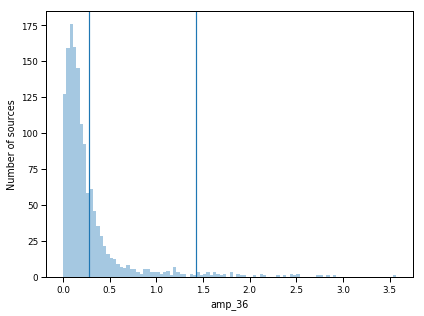

In [17]:
ig = plt.figure(figsize=(6,4.5))
ax = sns.distplot(second_data['amp_36'] ,kde=False, bins=100)
mean = np.nanmean(second_data['amp_36'])
std = np.nanstd(second_data['amp_36'])
print(mean)
print(std)
plt.axvline(x=np.nanmean(second_data['amp_36']))
plt.axvline(x=mean+3*std)
#ax = sns.countplot(pr_data[param_best_name], color='steelblue')
#ax.set_yscale('log')
ax.set_ylabel('Number of sources')
plt.tight_layout()
#ax.set_xticks([4,5,6])
#save_name = str('hist_'+param_best_name+'.pdf')
#plt.savefig(save_name, bbox_inches='tight')

0.34308002883922134
0.35830447283510175


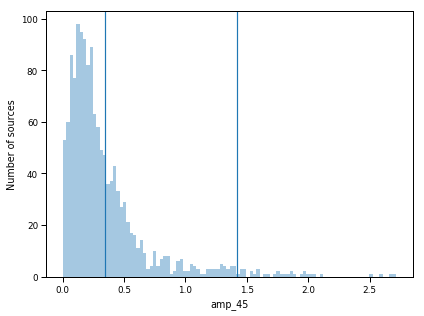

In [18]:
ig = plt.figure(figsize=(6,4.5))
ax = sns.distplot(second_data['amp_45'] ,kde=False, bins=100)
mean = np.nanmean(second_data['amp_45'])
std = np.nanstd(second_data['amp_45'])
print(mean)
print(std)
plt.axvline(x=np.nanmean(second_data['amp_45']))
plt.axvline(x=mean+3*std)
#ax = sns.countplot(pr_data[param_best_name], color='steelblue')
#ax.set_yscale('log')
ax.set_ylabel('Number of sources')
plt.tight_layout()
#ax.set_xticks([4,5,6])
#save_name = str('hist_'+param_best_name+'.pdf')
#plt.savefig(save_name, bbox_inches='tight')

# Table format shown in paper

In [ ]:
formatted_cols=['ID','RA','Dec',
                'mag_36_1','mag_err_36_1','mag_36_2','mag_err_36_2',
                'mag_36_3','mag_err_36_3','mag_36_4','mag_err_36_4',
                'mag_45_1','mag_err_45_1','mag_45_2','mag_err_45_2',
                'mag_45_3','mag_err_45_3','mag_45_4','mag_err_45_4',
                'total_associations'
          'sep_36_1&3_4','p_any_36_1&3_4','p_i_36_1&3_4',
          '36_associations',
          'ID_45_1','RA_45_1','Dec_45_1',,
          'ID_45_3','RA_45_3','Dec_45_3','mag_45_3','mag_err_45_3',
          'sep_45_1_3','p_any_45_1_3','p_i_45_1_3',
          'ID_45_4','RA_45_4','Dec_45_4','mag_45_4','mag_err_45_4',
          'sep_45_1&3_4','p_any_45_1&3_4','p_i_45_1&3_4',
          '45_associations',
          'sep_mean_36_mean_45','p_any_36_45','p_i_36_45']

new_data['mag_36_2']=9999
new_data['mag_45_2']=9999
new_data['mag_err_36_2']=9999
new_data['mag_err_45_2']=9999

formatted_data = new_data[formatted_cols]
formatted_data.rename_column('total_associations','Nepochs')

In [2]:
def deg2HMS(ra='', dec='', round=False):
    RA, DEC, rs, ds = '', '', '', ''
    if dec:
        if str(dec)[0] == '-':
            ds, dec = '-', abs(dec)
        deg = int(dec)
        deg1 = str(deg)
        decM = abs(int((dec-deg)*60))
        decM1 = str(decM)
        if round:
            decS = int((abs((dec-deg)*60)-decM)*60)
        else:
            decS = (abs((dec-deg)*60)-decM)*60
        decS1 = str(decS)
        DEC = str(ds)+deg1+':'+decM1+':'+decS1
        #DEC = '{0}{1} {2} {3}'.format(ds, deg, decM, decS)
  
    if ra:
        if str(ra)[0] == '-':
            rs, ra = '-', abs(ra)
        raH = int(ra/15)
        raH1 = str(raH)
        raM = int(((ra/15)-raH)*60)
        raM1 = str(raM)
        if round:
            raS = int(((((ra/15)-raH)*60)-raM)*60)
        else:
            raS = ((((ra/15)-raH)*60)-raM)*60
        raS1 = str(raS)
        RA = str(rs)+raH1+':'+raM1+':'+raS1
        #RA = '{0}{1} {2} {3}'.format(rs, raH1, raM1, raS1)
  
    if ra and dec:
        return (RA, DEC)
    else:
        return RA or DEC

In [3]:
RA = 30
RA = deg2HMS(ra=RA)
#RA = str(RA)
#RA = str(RA[0]) + ":" + str(RA[1]) + ":" + str(RA[2])
print(RA)

Dec = 45.75
Dec = deg2HMS(dec=Dec)
print(Dec)

2:0:0.0
45:45:0.0


In [8]:
for i in range(len(new_data)):
    RA = new_data['RA'][i]
    RA = deg2HMS(ra=RA)
    new_data['RA'][i] = RA
    DEC = new_data['Dec'][i]
    DEC = deg2HMS(dec=DEC)
    new_data['Dec'][i] = DEC
    
new_data[0:3].show_in_notebook()

ValueError: could not convert string to float: '0:42:25.367333200007636'